# Praktikum TF-IDF (2)

In [4]:
import pandas as pd
import numpy as np

In [5]:
dataset = pd.read_csv('clean_dataset_film_stem.csv',sep=';')

In [6]:
dataset.shape

(200, 10)

In [7]:
dataset.head(10)

,Unnamed: 0.1,Unnamed: 0,Sentiment,Text Tweet,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,negative,Jelek filmnya... apalagi si ernest gak mutu bg...,jelek filmnya apalagi si ernest gak mutu bgt a...,"['jelek', 'filmnya', 'apalagi', 'si', 'ernest'...","['jelek', 'filmnya', 'apalagi', 'si', 'ernest'...",jelek filmnya apalagi si ernest gak mutu bgt a...,jelek filmnya apalagi si ernest gak mutu bgt a...,jelek film si ernest gak mutu bgt actingnya fi...
1,1,1,negative,Film king Arthur ini film paling jelek dari se...,film king arthur ini film paling jelek dari se...,"['film', 'king', 'arthur', 'ini', 'film', 'pal...","['film', 'king', 'arthur', 'ini', 'film', 'pal...",film king arthur ini film paling jelek dari se...,film king arthur ini film paling jelek dari se...,film king arthur film paling jelek seluruh cer...
2,2,2,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...,bee sepanjang film gwa berkata kasar terus pad...,"['bee', 'sepanjang', 'film', 'gwa', 'berkata',...","['bee', 'sepanjang', 'film', 'gwa', 'berkata',...",bee sepanjang film gwa berkata kasar terus pad...,bee sepanjang film gwa berkata kasar terus pad...,bee panjang film gwa kata kasar terus bapak
3,3,3,negative,Ane ga suka fast and furious..menurutku kok je...,ane ga suka fast and furious menurutku kok jel...,"['ane', 'ga', 'suka', 'fast', 'and', 'furious'...","['ane', 'ga', 'suka', 'fast', 'and', 'furious'...",ane ga suka fast and furious menurutku kok jel...,ane ga suka fast and furious menurutku kok jel...,ane ga suka fast and furious turut kok jelek t...
4,4,4,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang...",baekhyun kan gua ga tau film nya lu bilang per...,"['baekhyun', 'kan', 'gua', 'ga', 'tau', 'film'...","['baekhyun', 'kan', 'gua', 'ga', 'tau', 'film'...",baekhyun kan gua ga tau film nya lu bilang per...,baekhyun kan gua ga tau film nya lu bilang per...,baekhyun kan gua ga tau film lu bilang perang ...
5,5,5,negative,tolong editingnya yg bagus ya. Saya sering kec...,tolong editingnya yg bagus ya saya sering kece...,"['tolong', 'editingnya', 'yg', 'bagus', 'ya', ...","['tolong', 'editingnya', 'yg', 'bagus', 'ya', ...",tolong editingnya yg bagus ya saya sering kece...,tolong editingnya yg bagus ya saya sering kece...,editingnya bagus saya sering kecewa dgn film i...
6,6,6,negative,Kecewa dgn salah satu aktornya yg ternyata pen...,kecewa dgn salah satu aktornya yg ternyata pen...,"['kecewa', 'dgn', 'salah', 'satu', 'aktornya',...","['kecewa', 'dgn', 'salah', 'satu', 'aktornya',...",kecewa dgn salah satu aktornya yg ternyata pen...,kecewa dgn salah satu aktornya yg ternyata pen...,kecewa dgn salah satu aktor nyata dukung nista...
7,7,7,negative,Kecewa parah sama film the guys. Dear @raditya...,kecewa parah sama film the guys dear radityadi...,"['kecewa', 'parah', 'sama', 'film', 'the', 'gu...","['kecewa', 'parah', 'sama', 'film', 'the', 'gu...",kecewa parah sama film the guys dear radityadi...,kecewa parah sama film the guys dear radityadi...,kecewa parah sama film the guys dear radityadi...
8,8,8,negative,Banyak yg kecewa abis nonton film ini :(,banyak yg kecewa abis nonton film ini,"['banyak', 'yg', 'kecewa', 'abis', 'nonton', '...","['banyak', 'yg', 'kecewa', 'abis', 'nonton', '...",banyak yg kecewa abis nonton film ini,banyak yg kecewa abis nonton film ini,banyak kecewa abis nonton film
9,9,9,negative,#TheMummy 2017 adalah film yang paling memgece...,adalah film yang paling memgecewakan saya se...,"['adalah', 'film', 'yang', 'paling', 'memgecew...","['adalah', 'film', 'yang', 'paling', 'memgecew...",adalah film yang paling memgecewakan saya sela...,adalah film yang paling memgecewakan saya sela...,film paling memgecewakan lama hidup yah padaha...


In [8]:
map = {'negative':0,'positive':1}
dataset.replace({'Sentiment' : map},inplace = True)

In [9]:
dataset.head(10)

,Unnamed: 0.1,Unnamed: 0,Sentiment,Text Tweet,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,0,Jelek filmnya... apalagi si ernest gak mutu bg...,jelek filmnya apalagi si ernest gak mutu bgt a...,"['jelek', 'filmnya', 'apalagi', 'si', 'ernest'...","['jelek', 'filmnya', 'apalagi', 'si', 'ernest'...",jelek filmnya apalagi si ernest gak mutu bgt a...,jelek filmnya apalagi si ernest gak mutu bgt a...,jelek film si ernest gak mutu bgt actingnya fi...
1,1,1,0,Film king Arthur ini film paling jelek dari se...,film king arthur ini film paling jelek dari se...,"['film', 'king', 'arthur', 'ini', 'film', 'pal...","['film', 'king', 'arthur', 'ini', 'film', 'pal...",film king arthur ini film paling jelek dari se...,film king arthur ini film paling jelek dari se...,film king arthur film paling jelek seluruh cer...
2,2,2,0,@beexkuanlin Sepanjang film gwa berkata kasar ...,bee sepanjang film gwa berkata kasar terus pad...,"['bee', 'sepanjang', 'film', 'gwa', 'berkata',...","['bee', 'sepanjang', 'film', 'gwa', 'berkata',...",bee sepanjang film gwa berkata kasar terus pad...,bee sepanjang film gwa berkata kasar terus pad...,bee panjang film gwa kata kasar terus bapak
3,3,3,0,Ane ga suka fast and furious..menurutku kok je...,ane ga suka fast and furious menurutku kok jel...,"['ane', 'ga', 'suka', 'fast', 'and', 'furious'...","['ane', 'ga', 'suka', 'fast', 'and', 'furious'...",ane ga suka fast and furious menurutku kok jel...,ane ga suka fast and furious menurutku kok jel...,ane ga suka fast and furious turut kok jelek t...
4,4,4,0,"@baekhyun36 kan gua ga tau film nya, lu bilang...",baekhyun kan gua ga tau film nya lu bilang per...,"['baekhyun', 'kan', 'gua', 'ga', 'tau', 'film'...","['baekhyun', 'kan', 'gua', 'ga', 'tau', 'film'...",baekhyun kan gua ga tau film nya lu bilang per...,baekhyun kan gua ga tau film nya lu bilang per...,baekhyun kan gua ga tau film lu bilang perang ...
5,5,5,0,tolong editingnya yg bagus ya. Saya sering kec...,tolong editingnya yg bagus ya saya sering kece...,"['tolong', 'editingnya', 'yg', 'bagus', 'ya', ...","['tolong', 'editingnya', 'yg', 'bagus', 'ya', ...",tolong editingnya yg bagus ya saya sering kece...,tolong editingnya yg bagus ya saya sering kece...,editingnya bagus saya sering kecewa dgn film i...
6,6,6,0,Kecewa dgn salah satu aktornya yg ternyata pen...,kecewa dgn salah satu aktornya yg ternyata pen...,"['kecewa', 'dgn', 'salah', 'satu', 'aktornya',...","['kecewa', 'dgn', 'salah', 'satu', 'aktornya',...",kecewa dgn salah satu aktornya yg ternyata pen...,kecewa dgn salah satu aktornya yg ternyata pen...,kecewa dgn salah satu aktor nyata dukung nista...
7,7,7,0,Kecewa parah sama film the guys. Dear @raditya...,kecewa parah sama film the guys dear radityadi...,"['kecewa', 'parah', 'sama', 'film', 'the', 'gu...","['kecewa', 'parah', 'sama', 'film', 'the', 'gu...",kecewa parah sama film the guys dear radityadi...,kecewa parah sama film the guys dear radityadi...,kecewa parah sama film the guys dear radityadi...
8,8,8,0,Banyak yg kecewa abis nonton film ini :(,banyak yg kecewa abis nonton film ini,"['banyak', 'yg', 'kecewa', 'abis', 'nonton', '...","['banyak', 'yg', 'kecewa', 'abis', 'nonton', '...",banyak yg kecewa abis nonton film ini,banyak yg kecewa abis nonton film ini,banyak kecewa abis nonton film
9,9,9,0,#TheMummy 2017 adalah film yang paling memgece...,adalah film yang paling memgecewakan saya se...,"['adalah', 'film', 'yang', 'paling', 'memgecew...","['adalah', 'film', 'yang', 'paling', 'memgecew...",adalah film yang paling memgecewakan saya sela...,adalah film yang paling memgecewakan saya sela...,film paling memgecewakan lama hidup yah padaha...


In [10]:
dataset_feature = dataset['ProcessedText']

In [11]:
dataset_label = dataset['Sentiment']

In [12]:
dataset_feature

0      jelek film si ernest gak mutu bgt actingnya fi...
1      film king arthur film paling jelek seluruh cer...
2            bee panjang film gwa kata kasar terus bapak
3      ane ga suka fast and furious turut kok jelek t...
4      baekhyun kan gua ga tau film lu bilang perang ...
                             ...                        
195    fargo adaptasi film cukup hasil season the bes...
196    waw sangat keren flm horor dng jumlah tonton g...
197    filmziarah film tenang hanyut salut mbah ponco...
198    film amat tarik kisah cinta setia saji tidak b...
199    nntn filmziarah film bagus kali menit tonton g...
Name: ProcessedText, Length: 200, dtype: object

In [13]:
dataset_label

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Sentiment, Length: 200, dtype: int64

# cek distribusi label

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\User\AppData\Local\Temp\ipykernel_16584\1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


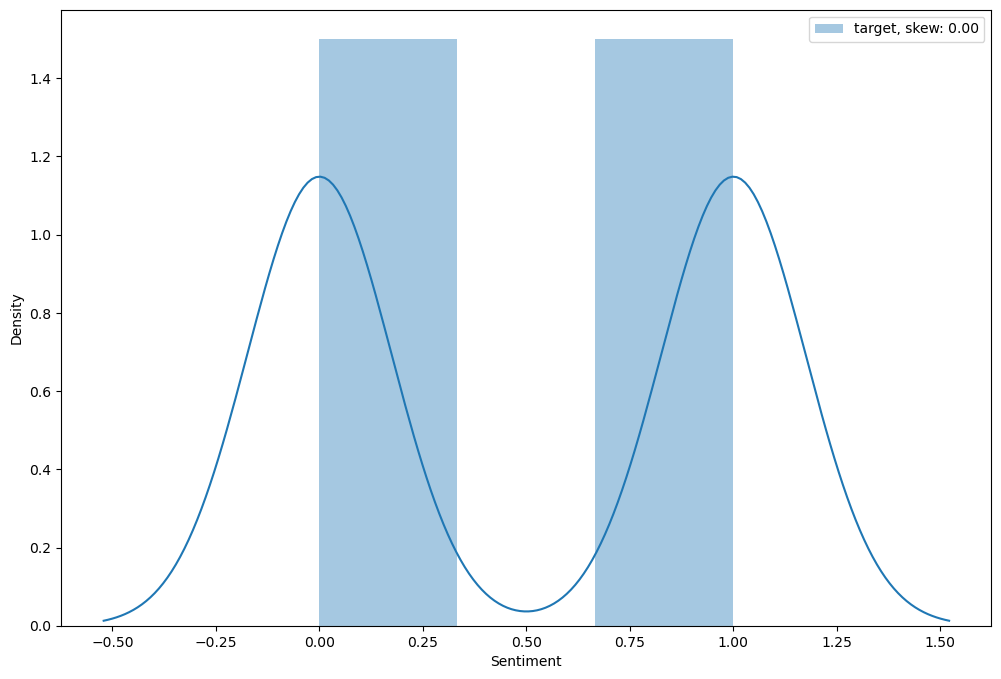

In [15]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

# TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vectorizer = TfidfVectorizer()

In [18]:
X = vectorizer.fit_transform(dataset_feature)

In [19]:
print(X.shape)

(200, 968)


In [20]:
features = vectorizer.get_feature_names_out()

In [26]:
features

array(['abis', 'abiss', 'acclaim', 'actingnya', 'action', 'ada', 'adalah',
       'adaptasi', 'adegan', 'adinia', 'aduh', 'aduk', 'after', 'agak',
       'agam', 'agama', 'air', 'aj', 'aja', 'ajaa', 'ajak', 'ajar',
       'akan', 'akhir', 'akhrnya', 'akting', 'aktor', 'aktris', 'aku',
       'ale', 'alf', 'alien', 'alitalit', 'alur', 'ama', 'amat',
       'amazing', 'ambigu', 'amira', 'anak', 'ancur', 'and', 'andibowooo',
       'ane', 'aneh', 'angkat', 'anjak', 'anjlok', 'anya', 'apa',
       'apalagi', 'apresiasi', 'arah', 'arthur', 'arti', 'artis', 'asa',
       'asih', 'asik', 'askmenfess', 'asli', 'astagah', 'atas', 'aurat',
       'awal', 'awisuryadi', 'baca', 'baekhyun', 'bagi', 'bagus',
       'bagussss', 'bahagia', 'bahas', 'bahasa', 'baik', 'baja', 'bakal',
       'balap', 'balik', 'banding', 'bandung', 'bang', 'bangat', 'banget',
       'bangettt', 'bangga', 'bangsa', 'bangt', 'banyak', 'bapak',
       'bareng', 'baru', 'barusan', 'batal', 'batas', 'bawa', 'bawah',
       'b

In [27]:
idfValues = vectorizer.idf_

In [28]:
d = dict(zip(features, 9 - idfValues))

In [29]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [30]:
for i in range(3867):
    print(sortedDict[i])

('film', 7.954190463968706)
('nonton', 6.774232535846644)
('tonton', 6.223055616557086)
('bagus', 6.0288996021161285)
('kecewa', 5.954791629962406)
('banget', 5.78773754529924)
('kartini', 5.78773754529924)
('sama', 5.78773754529924)
('the', 5.78773754529924)
('keren', 5.741217529664347)
('bikin', 5.692427365494915)
('jadi', 5.6411340711073645)
('jelek', 5.6411340711073645)
('indonesia', 5.587066849837089)
('guys', 5.52990843599714)
('banyak', 5.469283814180706)
('ga', 5.469283814180706)
('gak', 5.261644449402461)
('parah', 5.261644449402461)
('buat', 5.181601741728924)
('danur', 5.181601741728924)
('aja', 5.094590364739295)
('aku', 5.094590364739295)
('bgt', 5.094590364739295)
('kurang', 5.094590364739295)
('nyata', 5.094590364739295)
('radityadika', 5.094590364739295)
('sangat', 5.094590364739295)
('satu', 5.094590364739295)
('tp', 5.094590364739295)
('abis', 4.999280184934969)
('akhir', 4.999280184934969)
('cerita', 4.999280184934969)
('gue', 4.999280184934969)
('suka', 4.9992801849

IndexError: list index out of range

In [31]:
!pip install wordcloud


In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [33]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

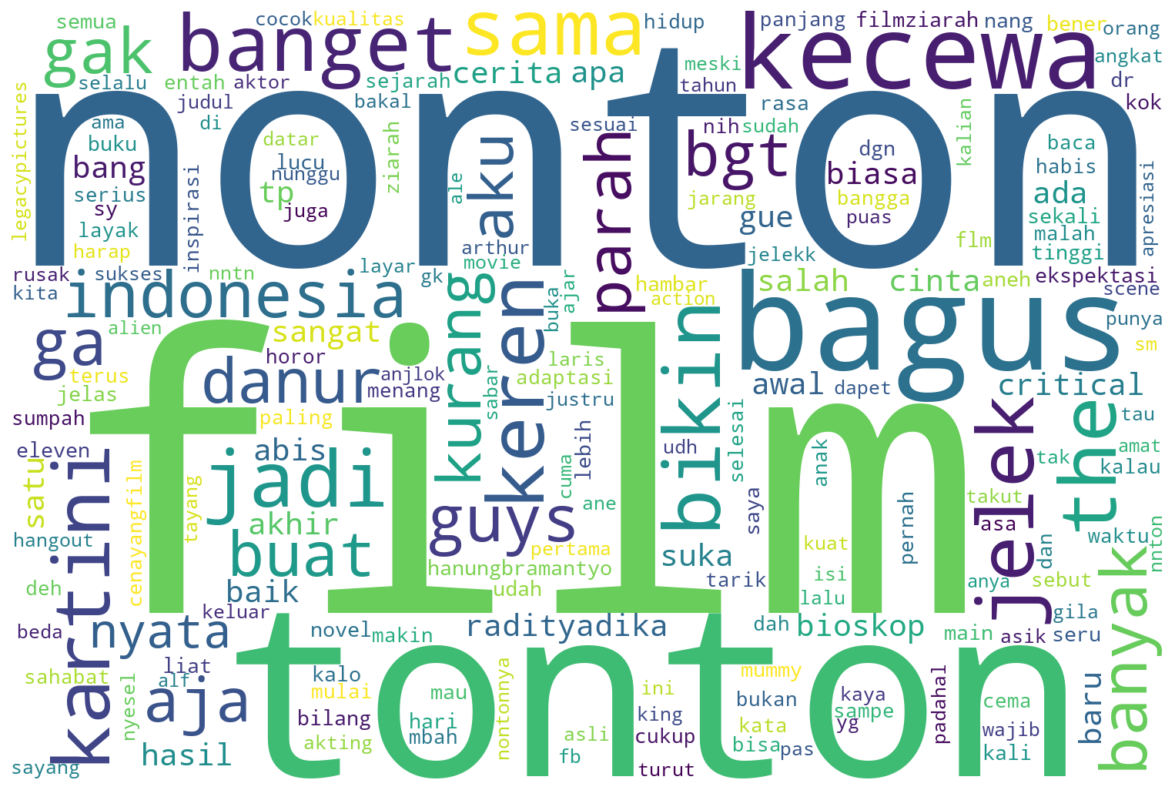

In [34]:
PlotWordCloud(d)